In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':60})

In [2]:
pth = r"C:/Users/Abisola/Desktop/rosmodeldata.xlsx"

In [3]:
data = pd.read_excel(pth, sheet_name='Sheet1')

In [4]:
data.head(10)

,storage_week,Samples,MoistureContent,Protein_content,Lipid_content,Crude_fiber,Ash_content,Starch_content,Sugar_content,Hydrocyanic_acid,Total_titrable_acidity,PH,Swelling_capacity,Temperature,Humidity
0,9,Envelop,12.53,3.74,3.50,6.29,1.27,74.67,4.60,0.84,0.190,4.3,3.3,34.2,91
1,9,Jute,12.08,3.78,3.46,2.78,1.15,76.75,4.80,0.83,0.230,4.3,3.4,32.4,89
2,9,Sack,9.34,3.75,2.66,3.96,1.36,78.93,4.90,0.60,0.230,4.2,3.6,32.8,90
3,9,Zip lock nylon,6.56,3.82,4.27,5.39,1.28,78.68,4.90,0.56,0.270,4.3,3.7,31.8,90
4,9,Plastic container,6.94,3.80,4.75,2.41,1.01,81.09,4.85,0.66,0.230,4.3,3.6,33.8,89
5,12,Envelop,7.53,3.48,1.89,3.08,1.31,82.71,4.58,0.84,0.198,4.1,3.7,33.8,89
6,12,Jute,10.03,3.71,5.37,3.82,1.40,75.67,4.85,0.82,0.270,4.3,3.7,31.8,89
7,12,Sack,9.10,3.68,3.06,3.84,1.56,78.76,4.96,0.58,0.261,4.1,3.7,32.0,90
8,12,Zip lock nylon,6.95,3.78,5.63,2.98,1.38,79.28,4.88,0.56,0.270,4.2,3.7,32.8,89
9,12,Plastic container,9.88,3.72,2.41,2.82,1.31,79.86,5.05,0.64,0.270,4.2,3.7,33.9,91


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   storage_week            15 non-null     int64  
 1   Samples                 15 non-null     object 
 2   MoistureContent         15 non-null     float64
 3   Protein_content         15 non-null     float64
 4   Lipid_content           15 non-null     float64
 5   Crude_fiber             15 non-null     float64
 6   Ash_content             15 non-null     float64
 7   Starch_content          15 non-null     float64
 8   Sugar_content           15 non-null     float64
 9   Hydrocyanic_acid        15 non-null     float64
 10  Total_titrable_acidity  15 non-null     float64
 11  PH                      15 non-null     float64
 12  Swelling_capacity       15 non-null     float64
 13  Temperature             15 non-null     float64
 14  Humidity                15 non-null     int6

In [6]:
data.describe()

,storage_week,MoistureContent,Protein_content,Lipid_content,Crude_fiber,Ash_content,Starch_content,Sugar_content,Hydrocyanic_acid,Total_titrable_acidity,PH,Swelling_capacity,Temperature,Humidity
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,9.495333,3.768667,3.649333,4.090667,1.216000,78.019333,4.772667,0.696000,0.235933,4.253333,3.613333,32.533333,89.666667
std,3.872983,3.462963,0.101620,1.270576,1.976485,0.211417,3.834659,0.282955,0.120463,0.030422,0.091548,0.124595,1.079462,0.723747
min,3.000000,4.120000,3.480000,1.890000,1.750000,0.720000,66.630000,3.870000,0.560000,0.180000,4.100000,3.300000,31.100000,89.000000
25%,3.000000,6.945000,3.730000,2.595000,2.800000,1.165000,77.300000,4.740000,0.590000,0.225000,4.200000,3.600000,31.800000,89.000000
50%,9.000000,9.340000,3.780000,3.460000,3.820000,1.270000,78.760000,4.850000,0.660000,0.230000,4.300000,3.700000,32.400000,90.000000
75%,12.000000,11.055000,3.835000,4.635000,4.735000,1.335000,79.570000,4.900000,0.830000,0.265500,4.300000,3.700000,33.550000,90.000000
max,12.000000,17.530000,3.910000,5.630000,8.530000,1.560000,82.710000,5.050000,0.840000,0.270000,4.400000,3.700000,34.200000,91.000000


In [7]:
columns_with_spaces = [col for col in data.columns if col != col.strip()]
print(columns_with_spaces)

['MoistureContent ']


In [8]:
# Remove leading/trailing spaces from all column names
data.columns = data.columns.str.strip()


In [9]:
print(data.columns)

Index(['storage_week', 'Samples', 'MoistureContent', 'Protein_content',
       'Lipid_content', 'Crude_fiber', 'Ash_content', 'Starch_content',
       'Sugar_content', 'Hydrocyanic_acid', 'Total_titrable_acidity', 'PH',
       'Swelling_capacity', 'Temperature', 'Humidity'],
      dtype='object')


In [10]:
def boxplot(column):
    sns.boxplot(data=data,x=data[f"{column}"])
    plt.title(f"Boxplot of {column}")
    plt.show()

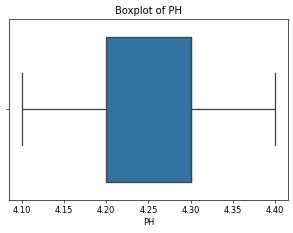

In [11]:
boxplot('PH')

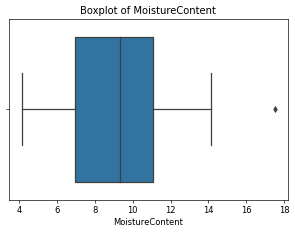

In [12]:
boxplot('MoistureContent')

In [13]:
print(data.columns)

Index(['storage_week', 'Samples', 'MoistureContent', 'Protein_content',
       'Lipid_content', 'Crude_fiber', 'Ash_content', 'Starch_content',
       'Sugar_content', 'Hydrocyanic_acid', 'Total_titrable_acidity', 'PH',
       'Swelling_capacity', 'Temperature', 'Humidity'],
      dtype='object')


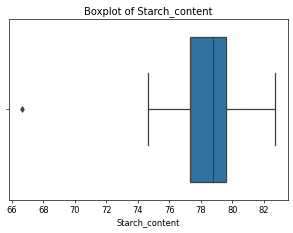

In [14]:
boxplot('Starch_content')

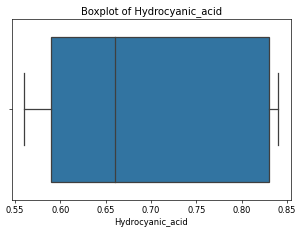

In [15]:
boxplot('Hydrocyanic_acid')

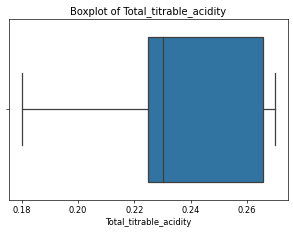

In [16]:
boxplot('Total_titrable_acidity')

In [17]:
def histgram(column):
    #sns.histplot(data2["price"],kde=True)
    sns.histplot(data=data,x=data[f"{column}"], kde = True)
    plt.title(f"Histgram plot of {column}")
    plt.show()

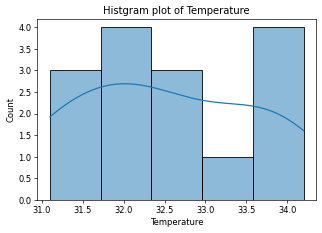

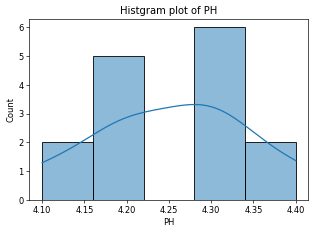

In [59]:
#histgram('Dissolve_oxygen')
histgram('Temperature')
histgram('PH')


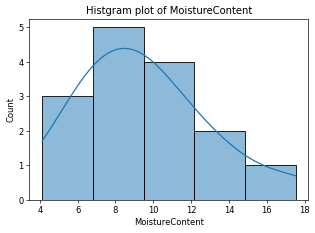

In [58]:
histgram('MoistureContent')

In [19]:
# skewness along the index axis
data.skew(axis = 0, skipna = True)

C:\Users\Abisola\AppData\Local\Temp\ipykernel_20992\1919563797.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis = 0, skipna = True)


storage_week             -0.425603
MoistureContent           0.803387
Protein_content          -1.589425
Lipid_content             0.351984
Crude_fiber               1.129420
Ash_content              -0.953680
Starch_content           -1.910487
Sugar_content            -2.552755
Hydrocyanic_acid          0.234645
Total_titrable_acidity   -0.420772
PH                       -0.112670
Swelling_capacity        -1.565057
Temperature               0.122995
Humidity                  0.628045
dtype: float64

In [20]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,storage_week,MoistureContent,Protein_content,Lipid_content,Crude_fiber,Ash_content,Starch_content,Sugar_content,Hydrocyanic_acid,Total_titrable_acidity,PH,Swelling_capacity,Temperature,Humidity
storage_week,1.000000,-0.191939,-0.722319,0.049062,-0.307553,0.685660,0.268322,0.340887,-0.045930,0.379502,-0.503639,0.162825,0.490344,0.025482
MoistureContent,-0.191939,1.000000,0.205088,-0.199021,0.332976,0.103545,-0.818959,0.190864,0.661192,-0.543050,-0.322702,-0.481591,-0.384830,0.231321
Protein_content,-0.722319,0.205088,1.000000,0.388568,0.321957,-0.490991,-0.439742,-0.065697,-0.191270,0.016374,0.584036,-0.179023,-0.476863,0.051797
Lipid_content,0.049062,-0.199021,0.388568,1.000000,0.009756,-0.175244,-0.174175,-0.364611,-0.061573,0.207872,0.389040,0.023974,0.012829,-0.389414
Crude_fiber,-0.307553,0.332976,0.321957,0.009756,1.000000,0.298396,-0.717652,0.155049,0.015882,-0.257531,0.173089,-0.027594,-0.271525,0.524967
Ash_content,0.685660,0.103545,-0.490991,-0.175244,0.298396,1.000000,-0.193149,0.634936,-0.181853,0.305584,-0.549147,0.319432,-0.021283,0.373453
Starch_content,0.268322,-0.818959,-0.439742,-0.174175,-0.717652,-0.193149,1.000000,-0.135003,-0.435626,0.389613,0.021473,0.308591,0.462395,-0.284480
Sugar_content,0.340887,0.190864,-0.065697,-0.364611,0.155049,0.634936,-0.135003,1.000000,-0.291366,0.445037,-0.306444,0.272439,-0.253109,0.308100
Hydrocyanic_acid,-0.045930,0.661192,-0.191270,-0.061573,0.015882,-0.181853,-0.435626,-0.291366,1.000000,-0.677189,-0.141197,-0.581553,0.018127,-0.196626
Total_titrable_acidity,0.379502,-0.543050,0.016374,0.207872,-0.257531,0.305584,0.389613,0.445037,-0.677189,1.000000,0.137297,0.578779,-0.095849,-0.027034


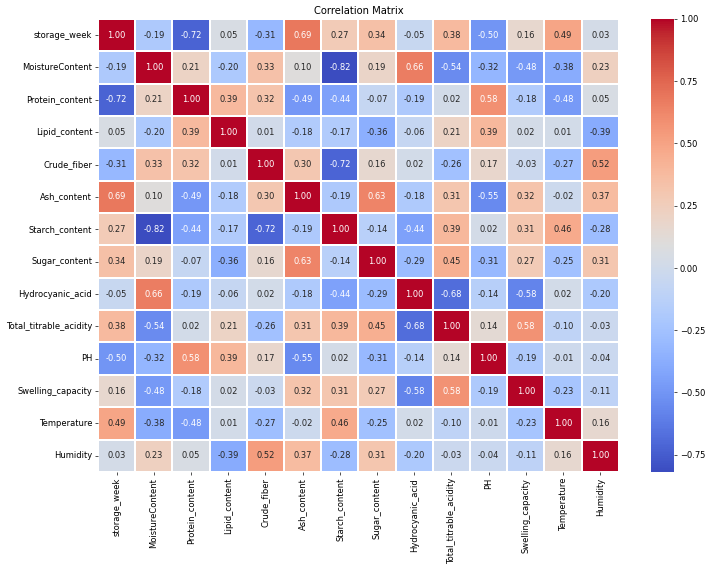

In [53]:
# plotting correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
# displaying heatmap
plt.show()

In [22]:
print(data.columns)

Index(['storage_week', 'Samples', 'MoistureContent', 'Protein_content',
       'Lipid_content', 'Crude_fiber', 'Ash_content', 'Starch_content',
       'Sugar_content', 'Hydrocyanic_acid', 'Total_titrable_acidity', 'PH',
       'Swelling_capacity', 'Temperature', 'Humidity'],
      dtype='object')


In [23]:
columns_to_drop = ["MoistureContent", "Samples", "storage_week"]
features = data.drop(columns=columns_to_drop, inplace=False)

### Predictive Analysis

In [24]:
features

,Protein_content,Lipid_content,Crude_fiber,Ash_content,Starch_content,Sugar_content,Hydrocyanic_acid,Total_titrable_acidity,PH,Swelling_capacity,Temperature,Humidity
0,3.74,3.50,6.29,1.27,74.67,4.60,0.84,0.190,4.3,3.3,34.2,91
1,3.78,3.46,2.78,1.15,76.75,4.80,0.83,0.230,4.3,3.4,32.4,89
2,3.75,2.66,3.96,1.36,78.93,4.90,0.60,0.230,4.2,3.6,32.8,90
3,3.82,4.27,5.39,1.28,78.68,4.90,0.56,0.270,4.3,3.7,31.8,90
4,3.80,4.75,2.41,1.01,81.09,4.85,0.66,0.230,4.3,3.6,33.8,89
5,3.48,1.89,3.08,1.31,82.71,4.58,0.84,0.198,4.1,3.7,33.8,89
6,3.71,5.37,3.82,1.40,75.67,4.85,0.82,0.270,4.3,3.7,31.8,89
7,3.68,3.06,3.84,1.56,78.76,4.96,0.58,0.261,4.1,3.7,32.0,90
8,3.78,5.63,2.98,1.38,79.28,4.88,0.56,0.270,4.2,3.7,32.8,89
9,3.72,2.41,2.82,1.31,79.86,5.05,0.64,0.270,4.2,3.7,33.9,91


In [25]:
label = data[['MoistureContent']]
label.head()

,MoistureContent
0,12.53
1,12.08
2,9.34
3,6.56
4,6.94


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(features, label, test_size =0.2, random_state = 42)

print('X_train dimension', X_train.shape)
print('X_test dimension', X_test.shape)
print('y_train dimension', y_train.shape)
print('y_test dimension', y_test.shape)

X_train dimension (12, 12)
X_test dimension (3, 12)
y_train dimension (12, 1)
y_test dimension (3, 1)


In [54]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)
X_train

array([[ 8.64989466e-01, -7.56334776e-01,  1.69407280e+00,
        -1.99030831e-01, -1.98436646e-02,  8.20714878e-01,
        -1.02652064e+00,  7.78431942e-01,  1.48529690e+00,
         6.76715542e-01, -3.38959610e-01,  1.00000000e+00],
       [-2.72078505e+00, -1.55344586e+00, -5.98896753e-01,
         3.85876100e-01,  1.14069740e+00, -6.25579872e-01,
         1.41965621e+00, -1.44054647e+00, -1.66003771e+00,
         6.76715542e-01,  1.58181151e+00, -1.00000000e+00],
       [ 1.10089568e-01,  1.39823281e+00, -6.51974752e-01,
         7.27071810e-01,  2.80944515e-01,  4.07487807e-01,
        -1.02652064e+00,  1.13633169e+00, -6.11592840e-01,
         6.76715542e-01,  4.51946146e-01, -1.00000000e+00],
       [-1.72997893e-01, -9.45747311e-01, -1.31810364e-01,
         6.29587321e-01,  1.93214629e-01,  4.76358985e-01,
        -6.77066808e-01, -2.95267288e-01, -6.11592840e-01,
        -4.83368245e-01,  4.51946146e-01,  1.00000000e+00],
       [ 1.10089568e-01, -3.14372194e-01, -7.5813075

In [55]:
X_test

array([[-0.45608536, -1.14305203, -0.73689955,  0.3858761 ,  0.42632547,
         0.99289282, -0.32761297,  1.13633169, -0.61159284,  0.67671554,
         1.69479805,  3.        ],
       [ 0.77062698, -1.04834577, -1.30483414, -1.66129816, -0.07749473,
         0.13200309,  1.33229275, -0.65316703, -0.61159284, -1.64345203,
        -1.46882498, -1.        ],
       [-0.26736038, -0.28280344,  1.10490701,  0.19090712, -0.87458341,
        -0.55670869,  1.41965621, -1.72686626,  0.43685203, -3.96361961,
         2.03375766,  3.        ]])

In [29]:
X_text_df = pd.DataFrame(X_test)
y_text_df = pd.DataFrame(y_test)
y_text_df

,MoistureContent
9,9.88
11,14.12
0,12.53


In [31]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict on the test data set
y_pred = lr.predict(X_test)

In [48]:

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Estimated coefficients: [[ 0.99226942 -0.77418354 -1.39894084  0.3253668  -2.73294542  0.33585684
   0.93051529 -0.51466284 -0.58126296  0.0094675  -0.20012475  0.15087696]]
Estimated intercept: [8.825]


In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 0.74


In [37]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.82


In [50]:
# Evaluating training set performance

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

Training set score: 1.00


In [39]:
# Evaluating test set performance

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Test set score: 0.82


In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the model coefficients and evaluation metrics
print(f'Coefficients: {lr.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [[ 0.99226942 -0.77418354 -1.39894084  0.3253668  -2.73294542  0.33585684
   0.93051529 -0.51466284 -0.58126296  0.0094675  -0.20012475  0.15087696]]
Mean Squared Error: 0.5538215272951255
R-squared: 0.8189349922749714


In [41]:
# print the real values
actual_MoistureContent = y_text_df
actual_MoistureContent_gain=actual_MoistureContent.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = lr.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
#print(predicted)
predicted.rename(columns={0:'Linear Regression Prediction'}, inplace=True)
Result = pd.concat([actual_MoistureContent_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   MoistureContent  Linear Regression Prediction
0             9.88                      9.167835
1            14.12                     14.001147
2            12.53                     11.462218


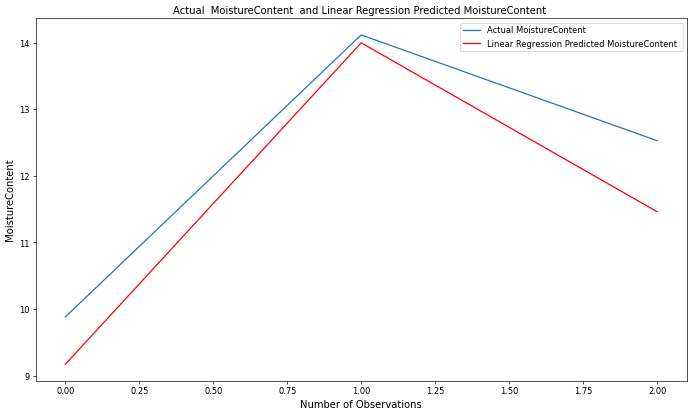

In [56]:

plt.figure(figsize =(14,8))
plt.title('Actual  MoistureContent  and Linear Regression Predicted MoistureContent ')
plt.xlabel('Number of Observations', fontsize = 12)
plt.ylabel(' MoistureContent ', fontsize = 12)
plt.plot(Result['MoistureContent'])
plt.plot(Result['Linear Regression Prediction'],'r')
plt.legend(['Actual MoistureContent ','Linear Regression Predicted MoistureContent '], loc = 'upper right')
plt.show()